<a href="https://colab.research.google.com/github/mees/calvin/blob/main/RL_with_CALVIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Reinforcement Learning with CALVIN</h1>

The **CALVIN** simulated benchmark is perfectly suited for training agents with reinforcement learning, in this notebook we will demonstrate how to integrate your agents to these environments.

## Installation
The first step is to install the CALVIN github repository such that we have access to the packages

In [1]:
# Download repo
%mkdir /content/calvin
%cd /content/calvin
!git clone https://github.com/mees/calvin_env.git
%cd /content/calvin/calvin_env
!git clone https://github.com/lukashermann/tacto.git
# Install packages
%cd /content/calvin/calvin_env/tacto/
!pip3 install -e .
%cd /content/calvin/calvin_env
!pip3 install -e .
!pip3 install -U numpy

/content/calvin
Cloning into 'calvin_env'...
remote: Enumerating objects: 566, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 566 (delta 82), reused 55 (delta 55), pack-reused 468 (from 2)
Receiving objects: 100% (566/566), 10.05 MiB | 33.64 MiB/s, done.
Resolving deltas: 100% (247/247), done.
/content/calvin/calvin_env
Cloning into 'tacto'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 269 (delta 37), reused 31 (delta 31), pack-reused 212 (from 1)
Receiving objects: 100% (269/269), 26.33 MiB | 27.18 MiB/s, done.
Resolving deltas: 100% (83/83), done.
/content/calvin/calvin_env/tacto
Obtaining file:///content/calvin/calvin_env/tacto
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/mmatl/pyopengl.git (to revision 76d1261adee2d3fd99b418e75b0416bb7d2865e6) to /tmp/pip-install-44xhccp1/pyopengl_05295

In [1]:
# Run this to check if the installation was succesful
from calvin_env.envs.play_table_env import PlayTableSimEnv

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/content/calvin/calvin_env/calvin_env/envs/play_table_env.py:289: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path="../../conf", config_name="config_data_collection")
/usr/local/lib/python

## Loading the environment
After the installation has finished successfully, we can start using the environment for reinforcement Learning.
To be able to use the environment we need to have the appropriate configuration that define the desired features, for this example, we will load the static and gripper camera.

In [2]:
%cd /content/calvin
from hydra import compose, initialize_config_dir
import hydra

CONFIG_DIR = "/content/calvin/calvin_env/conf"

with initialize_config_dir(version_base=None, config_dir=CONFIG_DIR):
    cfg = compose(
        config_name="config_data_collection",
        overrides=["cameras=static_and_gripper"],
    )


cfg.env["use_egl"] = False
cfg.env["show_gui"] = False
cfg.env["use_vr"] = False
cfg.env["use_scene_info"] = True

print(cfg.env)

/content/calvin
{'_target_': 'calvin_env.envs.play_table_env.PlayTableSimEnv', '_recursive_': False, 'cameras': '${cameras}', 'seed': 0, 'bullet_time_step': 240.0, 'use_vr': False, 'show_gui': False, 'robot_cfg': '${robot}', 'scene_cfg': '${scene}', 'use_scene_info': True, 'use_egl': False, 'control_freq': 30}


/usr/local/lib/python3.12/dist-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config_data_collection': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


The environment has similar structure to traditional OpenAI Gym environments.

*   We can restart the simulation with the *reset* function.
*   We can perform an action in the environment with the *step* function.
*   We can visualize images taken from the cameras in the environment by using the *render* function.





dict_keys(['rgb_obs', 'depth_obs', 'robot_obs', 'scene_obs'])


/usr/local/lib/python3.12/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


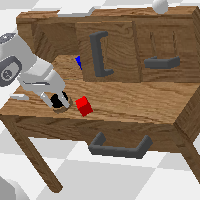

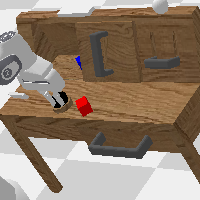

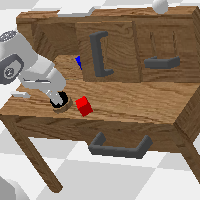

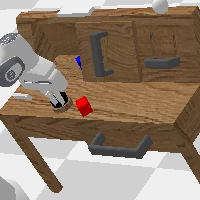

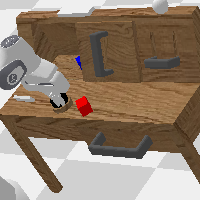

In [3]:
import time
import hydra
import numpy as np
from google.colab.patches import cv2_imshow

env = hydra.utils.instantiate(cfg.env)
observation = env.reset()
#The observation is given as a dictionary with different values
print(observation.keys())
for i in range(5):
  # The action consists in a pose displacement (position and orientation)
  action_displacement = np.random.uniform(low=-1, high=1, size=6)
  # And a binary gripper action, -1 for closing and 1 for oppening
  action_gripper = np.random.choice([-1, 1], size=1)
  action = np.concatenate((action_displacement, action_gripper), axis=-1)
  observation, reward, done, info = env.step(action)
  rgb = env.render(mode="rgb_array")[:,:,::-1]
  cv2_imshow(rgb)

##  Custom environment for Reinforcement Learning
There are some aspects that needs to be defined to be able to use it for reinforcement learning, including:

1.   Observation space
2.   Action space
3.   Reward function

We are going to create a Custom environment that extends the **PlaytableSimEnv** to add these requirements. <br/>
The specific task that will be solved is called "move_slider_left", here you can find a [list of possible tasks](https://github.com/mees/calvin_env/blob/main/conf/tasks/new_playtable_tasks.yaml) that can be evaluated using CALVIN.



In [4]:
from gym import spaces
from calvin_env.envs.play_table_env import PlayTableSimEnv

class SlideEnv(PlayTableSimEnv):
    def __init__(self,
                 tasks: dict = {},
                 **kwargs):
        super(SlideEnv, self).__init__(**kwargs)
        # For this example we will modify the observation to
        # only retrieve the end effector pose
        self.action_space = spaces.Box(low=-1, high=1, shape=(7,))
        self.observation_space = spaces.Box(low=-1, high=1, shape=(7,))
        # We can use the task utility to know if the task was executed correctly
        self.tasks = hydra.utils.instantiate(tasks)

    def reset(self):
        obs = super().reset()
        self.start_info = self.get_info()
        return obs

    def get_obs(self):
        """Overwrite robot obs to only retrieve end effector position"""
        robot_obs, robot_info = self.robot.get_observation()
        return robot_obs[:7]

    def _success(self):
        """ Returns a boolean indicating if the task was performed correctly """
        current_info = self.get_info()
        task_filter = ["move_slider_left"]
        task_info = self.tasks.get_task_info_for_set(self.start_info, current_info, task_filter)
        return 'move_slider_left' in task_info

    def _reward(self):
        """ Returns the reward function that will be used
        for the RL algorithm """
        reward = int(self._success()) * 10
        r_info = {'reward': reward}
        return reward, r_info

    def _termination(self):
        """ Indicates if the robot has reached a terminal state """
        success = self._success()
        done = success
        d_info = {'success': success}
        return done, d_info

    def step(self, action):
            """ Performing a relative action in the environment
                input:
                    action: 7 tuple containing
                            Position x, y, z.
                            Angle in rad x, y, z.
                            Gripper action
                            each value in range (-1, 1)

                            OR
                            8 tuple containing
                            Relative Joint angles j1 - j7 (in rad)
                            Gripper action
                output:
                    observation, reward, done info
            """
            # Transform gripper action to discrete space
            env_action = action.copy()
            env_action[-1] = (int(action[-1] >= 0) * 2) - 1

            # for using actions in joint space
            if len(env_action) == 8:
                env_action = {"action": env_action, "type": "joint_rel"}

            self.robot.apply_action(env_action)
            for i in range(self.action_repeat):
                self.p.stepSimulation(physicsClientId=self.cid)
            obs = self.get_obs()
            info = self.get_info()
            reward, r_info = self._reward()
            done, d_info = self._termination()
            info.update(r_info)
            info.update(d_info)
            return obs, reward, done, info

# Training an RL agent
After generating the wrapper training a reinforcement learning agent is straightforward, for this example we will use stable baselines 3 agents

In [5]:
!pip3 install stable_baselines3
!pip -q install "shimmy>=2.0" "gymnasium>=0.28"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 7.5 MB/s eta 0:00:00


To train the agent we create an instance of our new environment and send it to the stable baselines agent to learn a policy.


> Note: the example uses Soft Actor Critic (SAC) which is one of the state of the art algorithm for off-policy RL.



In [20]:
import os
from shimmy.openai_gym_compatibility import GymV21CompatibilityV0
from gymnasium.wrappers import TimeLimit
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.logger import configure
from stable_baselines3 import SAC

log_dir = "/content/sb3_logs"
os.makedirs(log_dir, exist_ok=True)

new_env_cfg = {**cfg.env}
new_env_cfg["tasks"] = cfg.tasks
new_env_cfg.pop("_target_", None)
new_env_cfg.pop("_recursive_", None)

base_env = SlideEnv(**new_env_cfg)

gn_env = GymV21CompatibilityV0(env=base_env)
wrapped = TimeLimit(gn_env, max_episode_steps=200)
env = Monitor(wrapped, filename=f"{log_dir}/monitor.csv")

logger = configure(log_dir, ["stdout", "csv", "tensorboard"])

model = SAC("MlpPolicy", env, verbose=1)
model.set_logger(logger)
model.learn(total_timesteps=10_000, tb_log_name="SAC_run1", log_interval=1, progress_bar=True)


Logging to /content/sb3_logs


Output()

/usr/local/lib/python3.12/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | 0        |
| time/              |          |
|    episodes        | 1        |
|    fps             | 84       |
|    time_elapsed    | 2        |
|    total_timesteps | 200      |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.191    |
|    ent_coef        | 0.971    |
|    ent_coef_loss   | -0.346   |
|    learning_rate   | 0.0003   |
|    n_updates       | 99       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | 0        |
| time/              |          |
|    episodes        | 2        |
|    fps             | 70       |
|    time_elapsed    | 5        |
|    total_timesteps | 400      |
| train/             |          |
|    actor_loss      | -12.9    |
|    critic_loss     | 0.142    |
|    ent_coef 